# Density Comparison Plot

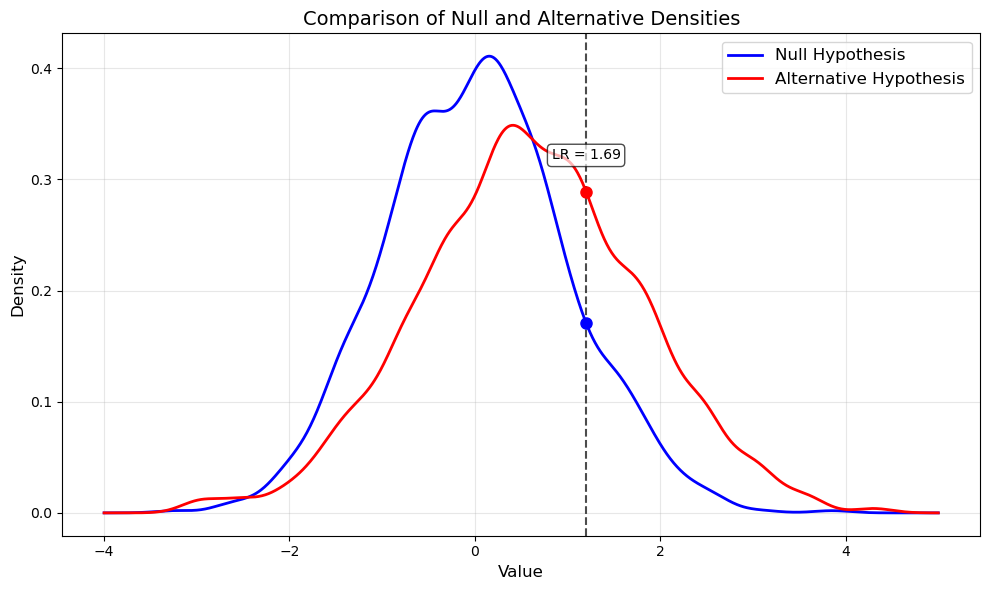

Observation value: 1.2
Log-likelihood under null: -1.7667
Log-likelihood under alternative: -1.2410
Likelihood ratio: 1.6916
Log likelihood ratio: 0.5257
Test statistic (-2 log LR): 1.0514


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Generate synthetic data
np.random.seed(42)
samples_null = np.random.normal(0, 1, 1000).reshape(-1, 1)  # Null: N(0,1)
samples_alt = np.random.normal(0.5, 1.2, 1000).reshape(-1, 1)  # Alt: N(0.5,1.2)

# Example observation
observation = np.array([1.2]).reshape(-1, 1)  # Value to test

# Create KDE models
kde_null = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_null)
kde_alt = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_alt)

# Compute log-likelihood for observation
logpdf_null = kde_null.score_samples(observation)[0]
logpdf_alt = kde_alt.score_samples(observation)[0]
lr = np.exp(logpdf_alt - logpdf_null)

# Plotting
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 5, 1000).reshape(-1, 1)
plt.plot(x, np.exp(kde_null.score_samples(x)), 'b-', lw=2, label='Null Hypothesis')
plt.plot(x, np.exp(kde_alt.score_samples(x)), 'r-', lw=2, label='Alternative Hypothesis')

# Mark the observation
plt.axvline(observation[0][0], color='k', linestyle='--', alpha=0.7)
null_density = np.exp(logpdf_null)
alt_density = np.exp(logpdf_alt)
plt.plot(observation[0][0], null_density, 'bo', markersize=8)
plt.plot(observation[0][0], alt_density, 'ro', markersize=8)

# Annotate likelihood ratio
plt.annotate(f'LR = {lr:.2f}', 
             xy=(observation[0][0], max(null_density, alt_density) * 1.1),
             ha='center', bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Comparison of Null and Alternative Densities', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Observation value: {observation[0][0]}")
print(f"Log-likelihood under null: {logpdf_null:.4f}")
print(f"Log-likelihood under alternative: {logpdf_alt:.4f}")
print(f"Likelihood ratio: {lr:.4f}")
print(f"Log likelihood ratio: {logpdf_alt - logpdf_null:.4f}")
print(f"Test statistic (-2 log LR): {-2 * (logpdf_null - logpdf_alt):.4f}")

# Likelihood Ratio Function Plot

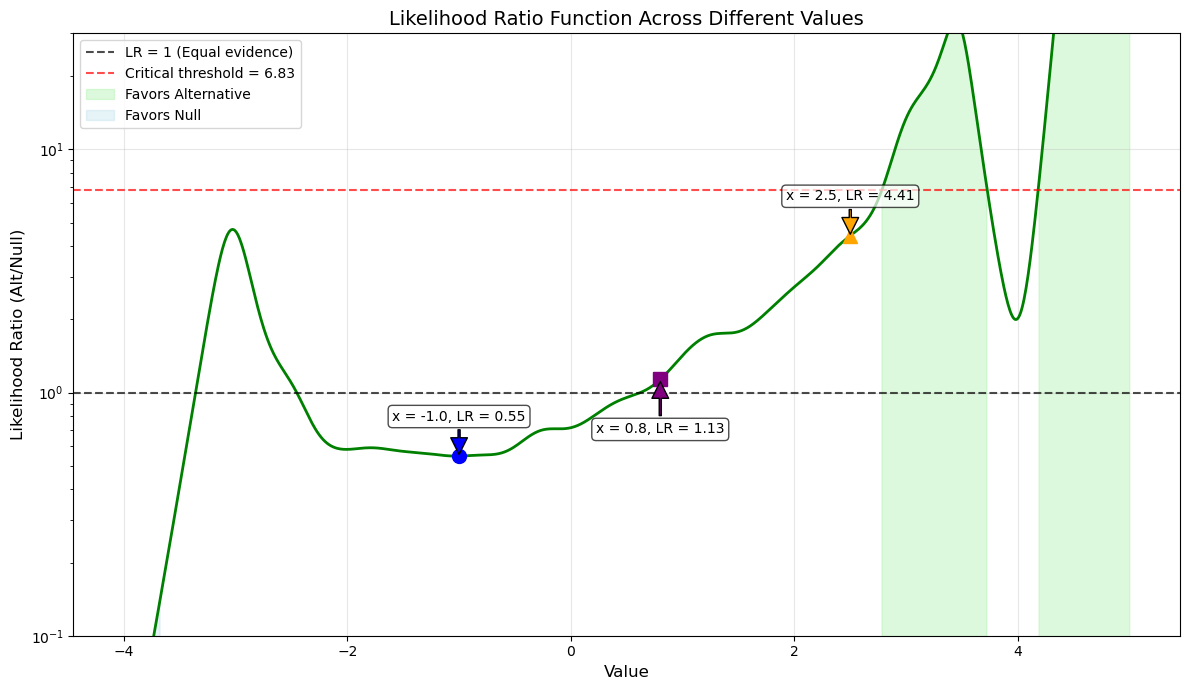

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
from sklearn.neighbors import KernelDensity

# Generate synthetic data
np.random.seed(42)
samples_null = np.random.normal(0, 1, 1000).reshape(-1, 1)  # Null: N(0,1)
samples_alt = np.random.normal(0.5, 1.2, 1000).reshape(-1, 1)  # Alt: N(0.5,1.2)

# Example observations
observations = np.array([-1.0, 0.8, 2.5]).reshape(-1, 1)

# Create KDE models
kde_null = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_null)
kde_alt = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_alt)

# Calculate likelihood ratio across a range
x = np.linspace(-4, 5, 1000).reshape(-1, 1)
null_likelihood = np.exp(kde_null.score_samples(x))
alt_likelihood = np.exp(kde_alt.score_samples(x))
lr = alt_likelihood / null_likelihood

# Critical value (for 1 degree of freedom, 95% confidence)
critical_threshold = np.exp(chi2.ppf(0.95, 1)/2)  # e^(χ²/2) transformation

# Plotting
plt.figure(figsize=(12, 7))

# Plot the likelihood ratio function
plt.plot(x, lr, 'g-', lw=2)
plt.axhline(y=1, color='k', linestyle='--', alpha=0.7, 
            label='LR = 1 (Equal evidence)')

# Mark decision threshold
plt.axhline(y=critical_threshold, color='r', linestyle='--', alpha=0.7,
            label=f'Critical threshold = {critical_threshold:.2f}')

# Shade regions
plt.fill_between(x.ravel(), 0, lr.ravel(), 
                 where=(lr.ravel() > critical_threshold), 
                 color='lightgreen', alpha=0.3, 
                 label='Favors Alternative')
plt.fill_between(x.ravel(), 0, lr.ravel(), 
                 where=(lr.ravel() < 1/critical_threshold), 
                 color='lightblue', alpha=0.3, 
                 label='Favors Null')

# Mark the observations
colors = ['blue', 'purple', 'orange']
markers = ['o', 's', '^']
for i, obs in enumerate(observations):
    obs_lr = np.exp(kde_alt.score_samples(obs.reshape(-1, 1))) / \
             np.exp(kde_null.score_samples(obs.reshape(-1, 1)))
    plt.plot(obs, obs_lr, marker=markers[i], color=colors[i], markersize=10)
    plt.annotate(f'x = {obs[0]:.1f}, LR = {obs_lr[0]:.2f}', 
                 xy=(obs, obs_lr), 
                 xytext=(obs, obs_lr*1.4 if i != 1 else obs_lr*0.6),
                 ha='center', 
                 arrowprops=dict(facecolor=colors[i], shrink=0.05, width=1.5),
                 bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.xlabel('Value', fontsize=12)
plt.ylabel('Likelihood Ratio (Alt/Null)', fontsize=12)
plt.yscale('log')  # Log scale often better visualizes ratio values
plt.ylim(0.1, 30)
plt.title('Likelihood Ratio Function Across Different Values', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Bootstrap Distribution of Likelihood Ratios

/tmp/ipykernel_3984559/823164062.py:75: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/export/home/bguenes/anaconda3/envs/simformer_torch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


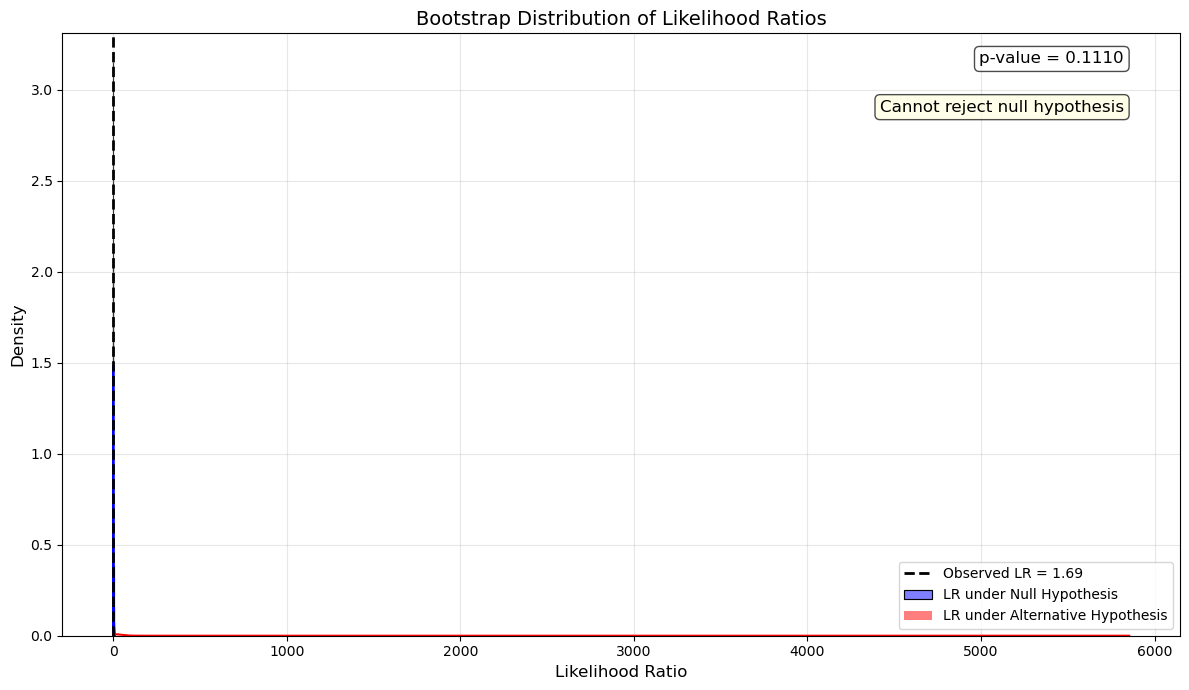

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

# Generate synthetic data
np.random.seed(42)
samples_null = np.random.normal(0, 1, 1000).reshape(-1, 1)  # Null: N(0,1) 
samples_alt = np.random.normal(0.5, 1.2, 1000).reshape(-1, 1)  # Alt: N(0.5,1.2)

# Example observation
observation = np.array([1.2]).reshape(-1, 1)

# Create KDE models
kde_null = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_null)
kde_alt = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_alt)

# Calculate observed LR
logpdf_null = kde_null.score_samples(observation)[0]
logpdf_alt = kde_alt.score_samples(observation)[0]
observed_lr = np.exp(logpdf_alt - logpdf_null)

# Generate bootstrap distributions of LR
n_bootstrap = 1000
lr_under_null = np.zeros(n_bootstrap)
lr_under_alt = np.zeros(n_bootstrap)

np.random.seed(123)
for i in range(n_bootstrap):
    # Sample from null distribution
    sample_null = np.random.normal(0, 1, 1).reshape(-1, 1)
    lr_under_null[i] = np.exp(kde_alt.score_samples(sample_null)[0] - 
                             kde_null.score_samples(sample_null)[0])
    
    # Sample from alternative distribution
    sample_alt = np.random.normal(0.5, 1.2, 1).reshape(-1, 1)
    lr_under_alt[i] = np.exp(kde_alt.score_samples(sample_alt)[0] - 
                            kde_null.score_samples(sample_alt)[0])

# Calculate p-value
p_value = (lr_under_null >= observed_lr).mean()

# Plotting
plt.figure(figsize=(12, 7))

# Plot histograms with KDEs
sns.histplot(lr_under_null, color='blue', alpha=0.5, 
             label='LR under Null Hypothesis', kde=True, stat='density')
sns.histplot(lr_under_alt, color='red', alpha=0.5, 
             label='LR under Alternative Hypothesis', kde=True, stat='density')

# Mark the observed LR
plt.axvline(observed_lr, color='k', linestyle='--', linewidth=2,
            label=f'Observed LR = {observed_lr:.2f}')

# Add p-value annotation
plt.text(0.95, 0.95, f'p-value = {p_value:.4f}', 
         transform=plt.gca().transAxes, ha='right', fontsize=12,
         bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# Add interpretation
if p_value < 0.05:
    interpretation = "Reject null hypothesis"
else:
    interpretation = "Cannot reject null hypothesis"
plt.text(0.95, 0.87, interpretation, 
         transform=plt.gca().transAxes, ha='right', fontsize=12,
         bbox=dict(boxstyle='round', fc='lightyellow', alpha=0.7))

plt.xlabel('Likelihood Ratio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Bootstrap Distribution of Likelihood Ratios', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2D Visualization for Multivariate Data

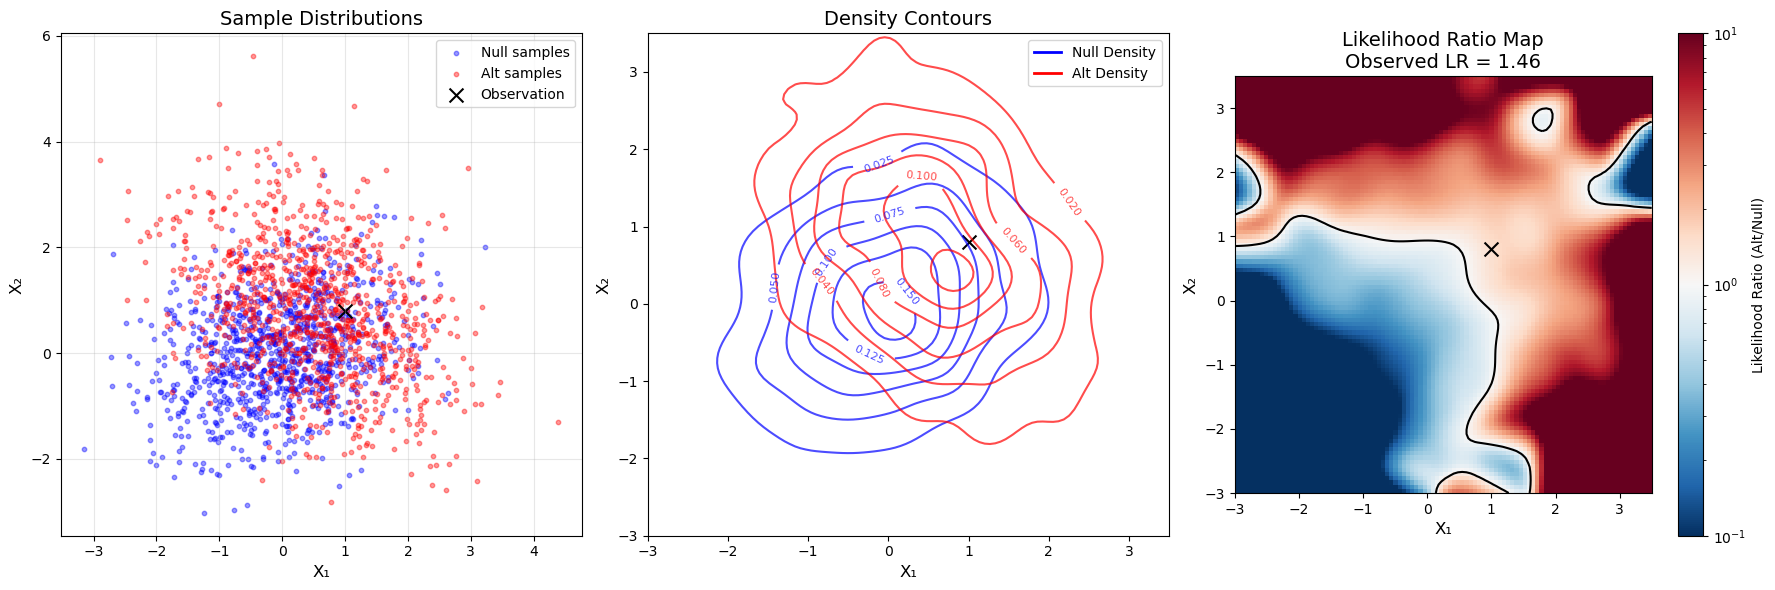

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from matplotlib.colors import LogNorm

# Generate 2D synthetic data
np.random.seed(42)
cov_null = np.array([[1.0, 0.3], [0.3, 1.0]])
cov_alt = np.array([[1.2, -0.5], [-0.5, 1.5]])

# Generate samples
n_samples = 1000
samples_null = np.random.multivariate_normal(mean=[0, 0], cov=cov_null, size=n_samples)
samples_alt = np.random.multivariate_normal(mean=[0.5, 0.8], cov=cov_alt, size=n_samples)

# Example observation
observation = np.array([[1.0, 0.8]])

# Create KDE models for 2D data
kde_null = KernelDensity(bandwidth=0.3, kernel='gaussian').fit(samples_null)
kde_alt = KernelDensity(bandwidth=0.3, kernel='gaussian').fit(samples_alt)

# Calculate log-likelihood and LR for observation
logpdf_null = kde_null.score_samples(observation)[0]
logpdf_alt = kde_alt.score_samples(observation)[0]
observed_lr = np.exp(logpdf_alt - logpdf_null)

# Create grid for plotting
x_range = np.linspace(-3, 3.5, 100)
y_range = np.linspace(-3, 3.5, 100)
xx, yy = np.meshgrid(x_range, y_range)
positions = np.vstack([xx.ravel(), yy.ravel()]).T

# Calculate densities and LR on grid
z_null = kde_null.score_samples(positions).reshape(xx.shape)
z_alt = kde_alt.score_samples(positions).reshape(xx.shape)
log_lr = z_alt - z_null
lr = np.exp(log_lr)

# Create figure with subplots
fig = plt.figure(figsize=(18, 6))

# Plot 1: Scatter plot of samples
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(samples_null[:, 0], samples_null[:, 1], c='blue', alpha=0.4, s=10, label='Null samples')
ax1.scatter(samples_alt[:, 0], samples_alt[:, 1], c='red', alpha=0.4, s=10, label='Alt samples')
ax1.scatter(observation[:, 0], observation[:, 1], c='black', s=100, marker='x', label='Observation')
ax1.set_xlabel('X₁', fontsize=12)
ax1.set_ylabel('X₂', fontsize=12)
ax1.legend(fontsize=10)
ax1.set_title('Sample Distributions', fontsize=14)
ax1.grid(True, alpha=0.3)

# Plot 2: Contour plot of densities
ax2 = fig.add_subplot(1, 3, 2)
contour_null = ax2.contour(xx, yy, np.exp(z_null), colors='blue', alpha=0.7, levels=6)
contour_alt = ax2.contour(xx, yy, np.exp(z_alt), colors='red', alpha=0.7, levels=6)
ax2.scatter(observation[:, 0], observation[:, 1], c='black', s=100, marker='x')
ax2.clabel(contour_null, inline=1, fontsize=8, fmt='%.3f')
ax2.clabel(contour_alt, inline=1, fontsize=8, fmt='%.3f')
ax2.set_xlabel('X₁', fontsize=12)
ax2.set_ylabel('X₂', fontsize=12)

# Add legend with proxy artists
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Null Density'),
    Line2D([0], [0], color='red', lw=2, label='Alt Density'),
]
ax2.legend(handles=legend_elements, fontsize=10)
ax2.set_title('Density Contours', fontsize=14)

# Plot 3: Likelihood ratio heat map
ax3 = fig.add_subplot(1, 3, 3)
im = ax3.imshow(lr, extent=[x_range.min(), x_range.max(), y_range.min(), y_range.max()], 
             origin='lower', cmap='RdBu_r', norm=LogNorm(vmin=0.1, vmax=10))
ax3.contour(xx, yy, lr, levels=[1.0], colors='k', linestyles='-')
ax3.scatter(observation[:, 0], observation[:, 1], c='black', s=100, marker='x')
ax3.set_xlabel('X₁', fontsize=12)
ax3.set_ylabel('X₂', fontsize=12)
plt.colorbar(im, ax=ax3, label='Likelihood Ratio (Alt/Null)')
ax3.set_title(f'Likelihood Ratio Map\nObserved LR = {observed_lr:.2f}', fontsize=14)

plt.tight_layout()
plt.show()

# Power Analysis Visualization

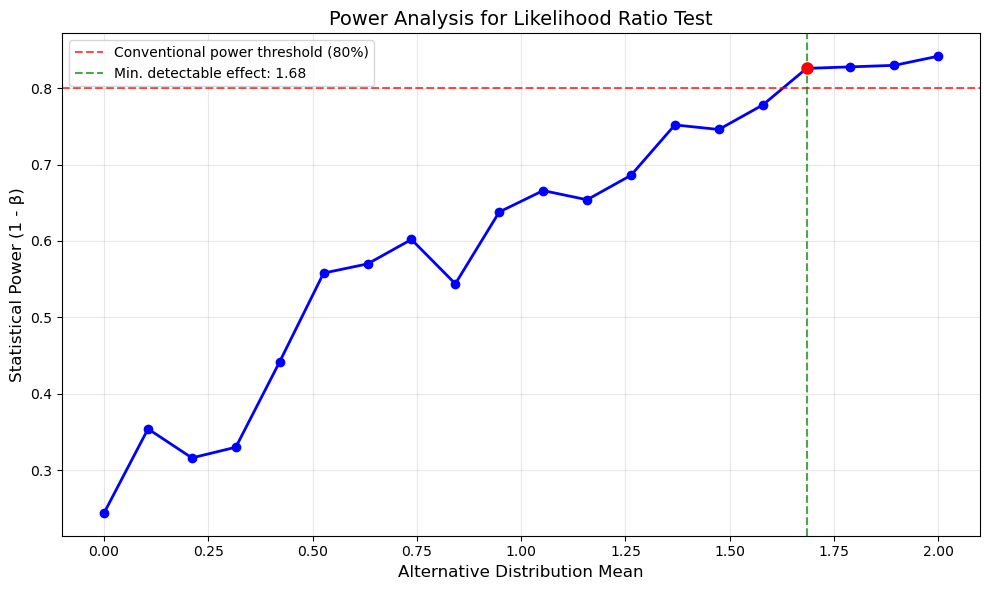

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate data
np.random.seed(42)

# Function to generate samples
def generate_samples(mean, std, n_samples=1000):
    return np.random.normal(mean, std, n_samples).reshape(-1, 1)

# Generate null distribution samples
samples_null = generate_samples(0, 1)

# Function to calculate test power at different means
def calculate_power(alt_means, null_mean=0, n_trials=500, alpha=0.05):
    # Fit null KDE once
    kde_null = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(samples_null)
    
    powers = []
    for alt_mean in alt_means:
        # Generate samples for this alternative
        alt_samples = generate_samples(alt_mean, 1)
        kde_alt = KernelDensity(bandwidth=0.2, kernel='gaussian').fit(alt_samples)
        
        # Test many samples to estimate power
        reject_count = 0
        for _ in range(n_trials):
            # Generate test sample from alternative distribution
            test_point = generate_samples(alt_mean, 1, 1)
            
            # Calculate LR
            logpdf_null = kde_null.score_samples(test_point)[0]
            logpdf_alt = kde_alt.score_samples(test_point)[0]
            lr = np.exp(logpdf_alt - logpdf_null)
            
            # Critical value approximation (assuming chi-square distribution)
            if lr > np.exp(alpha):  # Simplified threshold
                reject_count += 1
                
        power = reject_count / n_trials
        powers.append(power)
    
    return powers

# Calculate power for different effect sizes
alt_means = np.linspace(0, 2, 20)
powers = calculate_power(alt_means)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alt_means, powers, 'bo-', lw=2)
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, 
            label='Conventional power threshold (80%)')

# Find where power exceeds 80%
power_threshold = 0.8
exceeds_idx = np.where(np.array(powers) >= power_threshold)[0]
if len(exceeds_idx) > 0:
    first_exceed = exceeds_idx[0]
    min_detectable_effect = alt_means[first_exceed]
    plt.axvline(x=min_detectable_effect, color='g', linestyle='--', alpha=0.7,
                label=f'Min. detectable effect: {min_detectable_effect:.2f}')
    
    # Mark the point where power exceeds threshold
    plt.plot(min_detectable_effect, powers[first_exceed], 'ro', markersize=8)

plt.xlabel('Alternative Distribution Mean', fontsize=12)
plt.ylabel('Statistical Power (1 - β)', fontsize=12)
plt.title('Power Analysis for Likelihood Ratio Test', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Test 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from scipy.stats import chi2
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# Null hypothesis: Data from multivariate normal with certain parameters
# Alt hypothesis: Data from multivariate normal with different parameters

# Define parameters for null and alternative hypotheses
# (6 parameters controlling mean and covariance)
null_params = {
    'mean_shift': 0.0,           # Parameter 1
    'scale_factor': 1.0,         # Parameter 2
    'correlation_strength': 0.3, # Parameter 3
    'skewness': 0.0,             # Parameter 4
    'dimension_weight': 1.0,     # Parameter 5
    'noise_level': 0.5           # Parameter 6
}

alt_params = {
    'mean_shift': 0.7,           # Different mean
    'scale_factor': 1.5,         # Different scale
    'correlation_strength': 0.6, # Different correlation
    'skewness': 0.3,             # Different skewness
    'dimension_weight': 1.5,     # Different weight
    'noise_level': 0.3           # Different noise
}

# Function to generate 8D data based on parameters
def generate_data(params, n_samples=1000):
    # Create base covariance matrix with correlation
    base_cov = np.eye(8)
    for i in range(8):
        for j in range(8):
            if i != j:
                base_cov[i, j] = params['correlation_strength'] * min(i,j) / 8
    
    # Scale dimensions differently based on parameters
    weights = np.linspace(0.5, params['dimension_weight'], 8)
    scaled_cov = base_cov * weights.reshape(-1, 1) * weights.reshape(1, -1)
    
    # Generate data from multivariate normal
    X = np.random.multivariate_normal(
        mean=np.ones(8) * params['mean_shift'], 
        cov=scaled_cov * params['scale_factor'], 
        size=n_samples
    )
    
    # Add some non-normal components for skewness
    if params['skewness'] != 0:
        skew = np.random.exponential(scale=params['skewness'], size=(n_samples, 8)) - params['skewness']
        X += skew
    
    # Add random noise
    X += np.random.normal(0, params['noise_level'], size=X.shape)
    
    return X

# Generate samples
X_null = generate_data(null_params, n_samples=2000)
X_alt = generate_data(alt_params, n_samples=2000)

# Generate a single test observation (closer to alternative)
blend_factor = 0.7  # Controls how close to alternative vs null
observation = blend_factor * generate_data(alt_params, n_samples=1)[0] + \
             (1 - blend_factor) * generate_data(null_params, n_samples=1)[0]

# Fit KDEs to estimate likelihood functions
kde_null = KernelDensity(bandwidth=0.5).fit(X_null)
kde_alt = KernelDensity(bandwidth=0.5).fit(X_alt)

# Evaluate log-likelihoods
log_likelihood_null = kde_null.score_samples(observation.reshape(1, -1))[0]
log_likelihood_alt = kde_alt.score_samples(observation.reshape(1, -1))[0]

# Calculate likelihood ratio
lr = np.exp(log_likelihood_alt - log_likelihood_null)
log_lr = log_likelihood_alt - log_likelihood_null

# Calculate p-value under chi-square distribution (Wilks' theorem)
# Degrees of freedom = difference in number of parameters (6-0=6)
p_value = 1 - chi2.cdf(-2 * log_likelihood_null + 2 * log_likelihood_alt, df=6)

print(f"Log-likelihood under null: {log_likelihood_null:.4f}")
print(f"Log-likelihood under alternative: {log_likelihood_alt:.4f}")
print(f"Log likelihood ratio: {log_lr:.4f}")
print(f"Likelihood ratio: {lr:.4f}")
print(f"p-value: {p_value:.4f}")

# Now create visualizations

Log-likelihood under null: -15.6716
Log-likelihood under alternative: -13.2087
Log likelihood ratio: 2.4629
Likelihood ratio: 11.7388
p-value: 0.5534


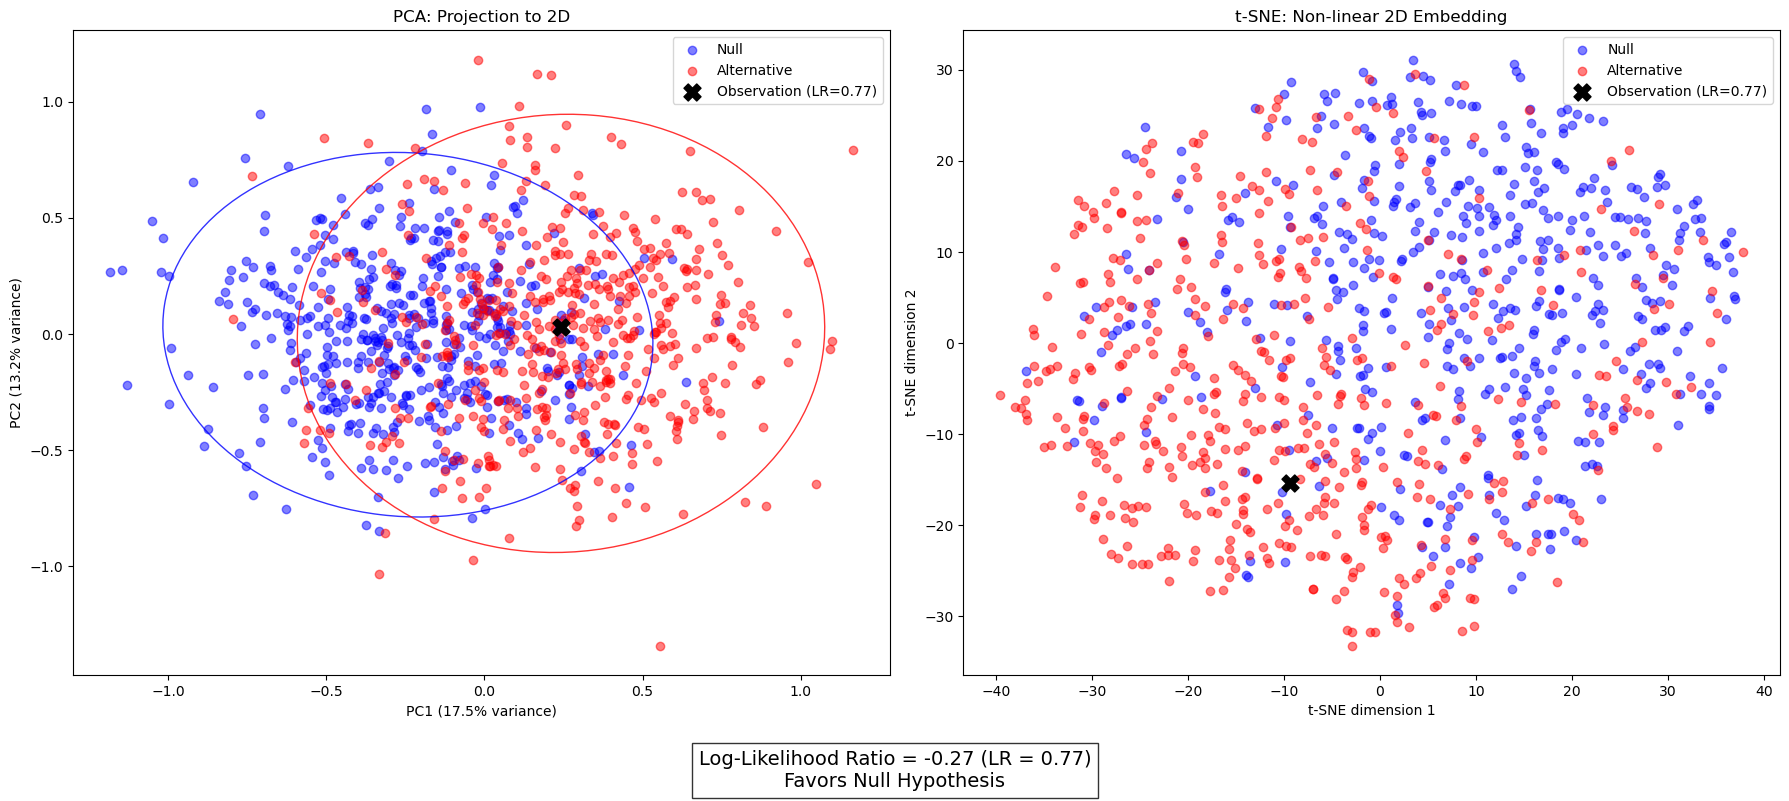

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KernelDensity
import seaborn as sns

# Generate synthetic data
np.random.seed(42)

# Parameters - 6D parameter space
true_null_params = np.array([0.0, 0.5, 1.0, 0.2, 0.7, 0.3])
true_alt_params = np.array([0.2, 0.7, 1.3, 0.1, 0.9, 0.4])

# Generate samples - 8D observation space
n_samples = 500
X_null = np.random.multivariate_normal(
    mean=np.concatenate([true_null_params, [0.1, 0.2]]),
    cov=np.eye(8) * 0.1,
    size=n_samples
)

X_alt = np.random.multivariate_normal(
    mean=np.concatenate([true_alt_params, [0.2, 0.3]]),
    cov=np.eye(8) * 0.12,
    size=n_samples
)

# Single observation to test (closer to alternative)
observation = np.concatenate([true_alt_params, [0.15, 0.25]]) + np.random.normal(0, 0.05, 8)

# Fit KDEs
kde_null = KernelDensity(bandwidth=0.15).fit(X_null)
kde_alt = KernelDensity(bandwidth=0.15).fit(X_alt)

# Calculate log-likelihood ratio for the observation
log_likelihood_null = kde_null.score_samples(observation.reshape(1, -1))[0]
log_likelihood_alt = kde_alt.score_samples(observation.reshape(1, -1))[0]
log_lr = log_likelihood_alt - log_likelihood_null
lr = np.exp(log_lr)

# Create dimension reduction plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# PCA Reduction
pca = PCA(n_components=2)
pca.fit(np.vstack([X_null, X_alt]))
pca_null = pca.transform(X_null)
pca_alt = pca.transform(X_alt)
pca_obs = pca.transform(observation.reshape(1, -1))

# t-SNE Reduction
tsne = TSNE(n_components=2, random_state=42)
combined_data = np.vstack([X_null, X_alt, observation.reshape(1, -1)])
tsne_results = tsne.fit_transform(combined_data)
tsne_null = tsne_results[:n_samples]
tsne_alt = tsne_results[n_samples:-1]
tsne_obs = tsne_results[-1:]

# Plot PCA results
ax = axes[0]
ax.scatter(pca_null[:, 0], pca_null[:, 1], c='blue', alpha=0.5, label='Null')
ax.scatter(pca_alt[:, 0], pca_alt[:, 1], c='red', alpha=0.5, label='Alternative')
ax.scatter(pca_obs[:, 0], pca_obs[:, 1], c='black', marker='X', s=150, label=f'Observation (LR={lr:.2f})')

# Add ellipses for 95% confidence regions
for data, color in [(pca_null, 'blue'), (pca_alt, 'red')]:
    mean = np.mean(data, axis=0)
    cov = np.cov(data.T)
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    width, height = 2 * np.sqrt(5.991 * eigvals)  # 95% confidence
    ell = plt.matplotlib.patches.Ellipse(
        xy=mean, width=width, height=height, angle=angle, 
        color=color, fill=False, alpha=0.8)
    ax.add_patch(ell)

var_explained = pca.explained_variance_ratio_
ax.set_xlabel(f'PC1 ({var_explained[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({var_explained[1]:.1%} variance)')
ax.set_title('PCA: Projection to 2D')
ax.legend()

# Plot t-SNE results
ax = axes[1]
ax.scatter(tsne_null[:, 0], tsne_null[:, 1], c='blue', alpha=0.5, label='Null')
ax.scatter(tsne_alt[:, 0], tsne_alt[:, 1], c='red', alpha=0.5, label='Alternative')
ax.scatter(tsne_obs[:, 0], tsne_obs[:, 1], c='black', marker='X', s=150, label=f'Observation (LR={lr:.2f})')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
ax.set_title('t-SNE: Non-linear 2D Embedding')
ax.legend()

# Add test result annotation
plt.figtext(0.5, 0.01, 
            f"Log-Likelihood Ratio = {log_lr:.2f} (LR = {lr:.2f})\n" + 
            f"{'Favors Alternative' if log_lr > 0 else 'Favors Null'} Hypothesis",
            ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":0.8, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

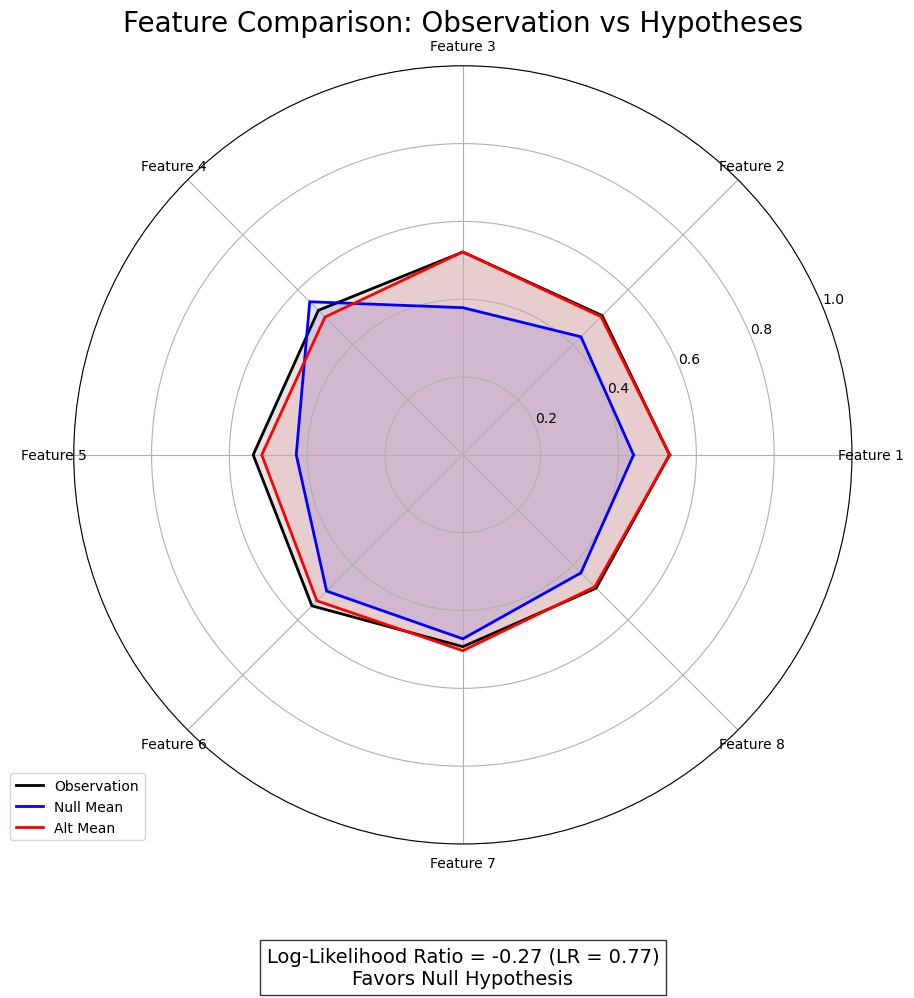

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data (same as previous example)
np.random.seed(42)
true_null_params = np.array([0.0, 0.5, 1.0, 0.2, 0.7, 0.3])
true_alt_params = np.array([0.2, 0.7, 1.3, 0.1, 0.9, 0.4])
n_samples = 500
X_null = np.random.multivariate_normal(
    mean=np.concatenate([true_null_params, [0.1, 0.2]]),
    cov=np.eye(8) * 0.1, size=n_samples)
X_alt = np.random.multivariate_normal(
    mean=np.concatenate([true_alt_params, [0.2, 0.3]]),
    cov=np.eye(8) * 0.12, size=n_samples)
observation = np.concatenate([true_alt_params, [0.15, 0.25]]) + np.random.normal(0, 0.05, 8)

# Scale data to 0-1 range for radar plot
scaler = MinMaxScaler()
scaler.fit(np.vstack([X_null, X_alt, observation.reshape(1, -1)]))
observation_scaled = scaler.transform(observation.reshape(1, -1))[0]
null_mean_scaled = scaler.transform(np.mean(X_null, axis=0).reshape(1, -1))[0]
alt_mean_scaled = scaler.transform(np.mean(X_alt, axis=0).reshape(1, -1))[0]

# Create radar plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, polar=True)

# Set the angles for each feature
features = [f'Feature {i+1}' for i in range(8)]
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Add values for observation and means
observation_scaled = np.append(observation_scaled, observation_scaled[0])
null_mean_scaled = np.append(null_mean_scaled, null_mean_scaled[0])
alt_mean_scaled = np.append(alt_mean_scaled, alt_mean_scaled[0])
features.append(features[0])  # Close the loop

# Draw the plot
ax.plot(angles, observation_scaled, 'k-', linewidth=2, label='Observation')
ax.fill(angles, observation_scaled, 'k', alpha=0.1)
ax.plot(angles, null_mean_scaled, 'b-', linewidth=2, label='Null Mean')
ax.fill(angles, null_mean_scaled, 'b', alpha=0.1)
ax.plot(angles, alt_mean_scaled, 'r-', linewidth=2, label='Alt Mean')
ax.fill(angles, alt_mean_scaled, 'r', alpha=0.1)

# Add feature labels
ax.set_thetagrids(np.degrees(angles[:-1]), features[:-1])
ax.set_ylim(0, 1)
ax.grid(True)
ax.set_title('Feature Comparison: Observation vs Hypotheses', size=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Calculate the likelihood 
from sklearn.neighbors import KernelDensity
kde_null = KernelDensity(bandwidth=0.15).fit(X_null)
kde_alt = KernelDensity(bandwidth=0.15).fit(X_alt)
log_likelihood_null = kde_null.score_samples(observation.reshape(1, -1))[0]
log_likelihood_alt = kde_alt.score_samples(observation.reshape(1, -1))[0]
log_lr = log_likelihood_alt - log_likelihood_null
lr = np.exp(log_lr)

# Add test result annotation
plt.figtext(0.5, 0.01, 
            f"Log-Likelihood Ratio = {log_lr:.2f} (LR = {lr:.2f})\n" + 
            f"{'Favors Alternative' if log_lr > 0 else 'Favors Null'} Hypothesis",
            ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":0.8, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

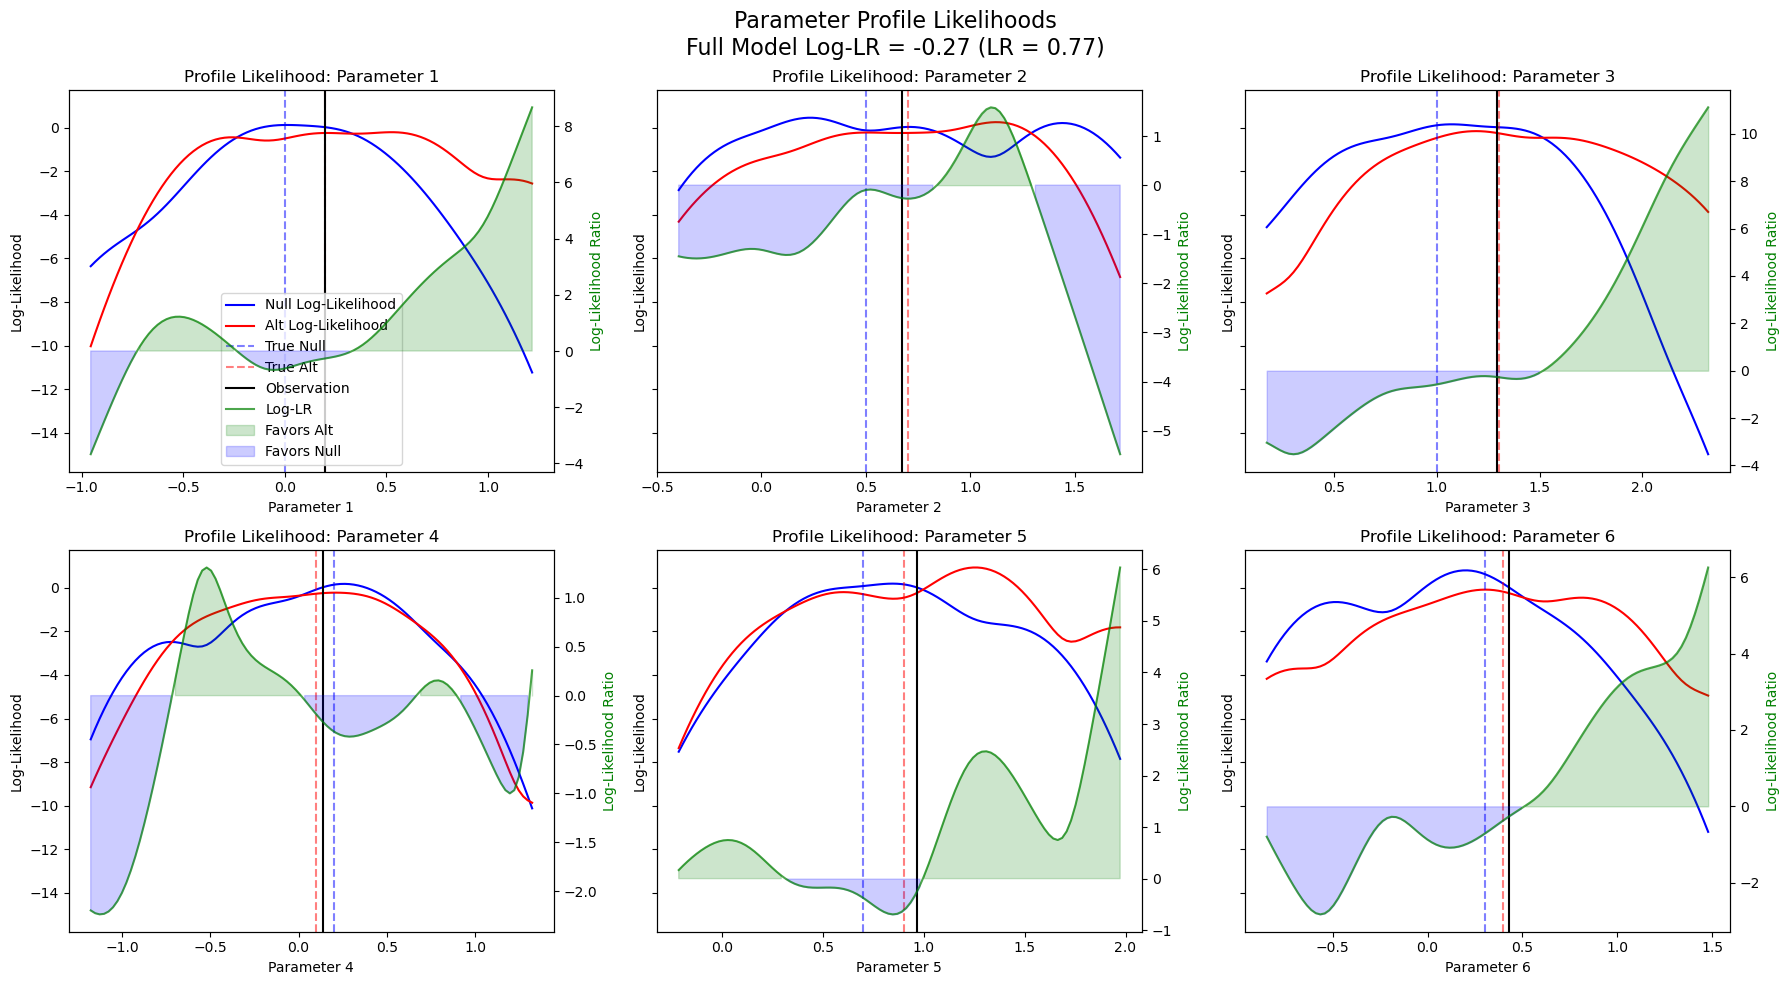

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

# Generate synthetic data (same setup as before)
np.random.seed(42)
true_null_params = np.array([0.0, 0.5, 1.0, 0.2, 0.7, 0.3])
true_alt_params = np.array([0.2, 0.7, 1.3, 0.1, 0.9, 0.4])
n_samples = 500
X_null = np.random.multivariate_normal(
    mean=np.concatenate([true_null_params, [0.1, 0.2]]),
    cov=np.eye(8) * 0.1, size=n_samples)
X_alt = np.random.multivariate_normal(
    mean=np.concatenate([true_alt_params, [0.2, 0.3]]),
    cov=np.eye(8) * 0.12, size=n_samples)
observation = np.concatenate([true_alt_params, [0.15, 0.25]]) + np.random.normal(0, 0.05, 8)

# Fit full-dimensional KDEs
kde_null = KernelDensity(bandwidth=0.15).fit(X_null)
kde_alt = KernelDensity(bandwidth=0.15).fit(X_alt)

# Function to evaluate profile likelihood for varying one parameter
def evaluate_profile_likelihood(param_idx, param_values):
    # Create modified observations for each parameter value
    test_points = np.tile(observation, (len(param_values), 1))
    test_points[:, param_idx] = param_values
    
    # Calculate likelihoods
    null_ll = kde_null.score_samples(test_points)
    alt_ll = kde_alt.score_samples(test_points)
    
    return null_ll, alt_ll

# Plot parameter profiles
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()
parameter_names = [f'Parameter {i+1}' for i in range(6)]

for i in range(6):
    # Range for this parameter
    param_min = min(np.min(X_null[:, i]), np.min(X_alt[:, i]))
    param_max = max(np.max(X_null[:, i]), np.max(X_alt[:, i]))
    param_values = np.linspace(param_min, param_max, 100)
    
    # Calculate profile likelihoods
    null_ll, alt_ll = evaluate_profile_likelihood(i, param_values)
    
    # Plot likelihoods
    ax = axes[i]
    ax.plot(param_values, null_ll, 'b-', label='Null Log-Likelihood')
    ax.plot(param_values, alt_ll, 'r-', label='Alt Log-Likelihood')
    
    # Plot log-likelihood ratio on secondary y-axis
    ax2 = ax.twinx()
    lr = alt_ll - null_ll
    ax2.plot(param_values, lr, 'g-', label='Log-LR', alpha=0.7)
    ax2.fill_between(param_values, 0, lr, where=(lr > 0), 
                     color='green', alpha=0.2, label='Favors Alt')
    ax2.fill_between(param_values, 0, lr, where=(lr < 0), 
                     color='blue', alpha=0.2, label='Favors Null')
    
    # Mark true parameter values and observation
    ax.axvline(true_null_params[i], color='blue', linestyle='--', 
               alpha=0.5, label='True Null')
    ax.axvline(true_alt_params[i], color='red', linestyle='--', 
               alpha=0.5, label='True Alt')
    ax.axvline(observation[i], color='black', linestyle='-', 
               label='Observation')
    
    
    ax.set_xlabel(parameter_names[i])
    ax.set_ylabel('Log-Likelihood')
    ax2.set_ylabel('Log-Likelihood Ratio', color='g')
    ax.set_title(f'Profile Likelihood: {parameter_names[i]}')
    
    # Only show legend on first plot to avoid clutter
    if i == 0:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Full model results
log_likelihood_null = kde_null.score_samples(observation.reshape(1, -1))[0]
log_likelihood_alt = kde_alt.score_samples(observation.reshape(1, -1))[0]
log_lr = log_likelihood_alt - log_likelihood_null
lr = np.exp(log_lr)

plt.suptitle(f"Parameter Profile Likelihoods\nFull Model Log-LR = {log_lr:.2f} (LR = {lr:.2f})", 
             fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

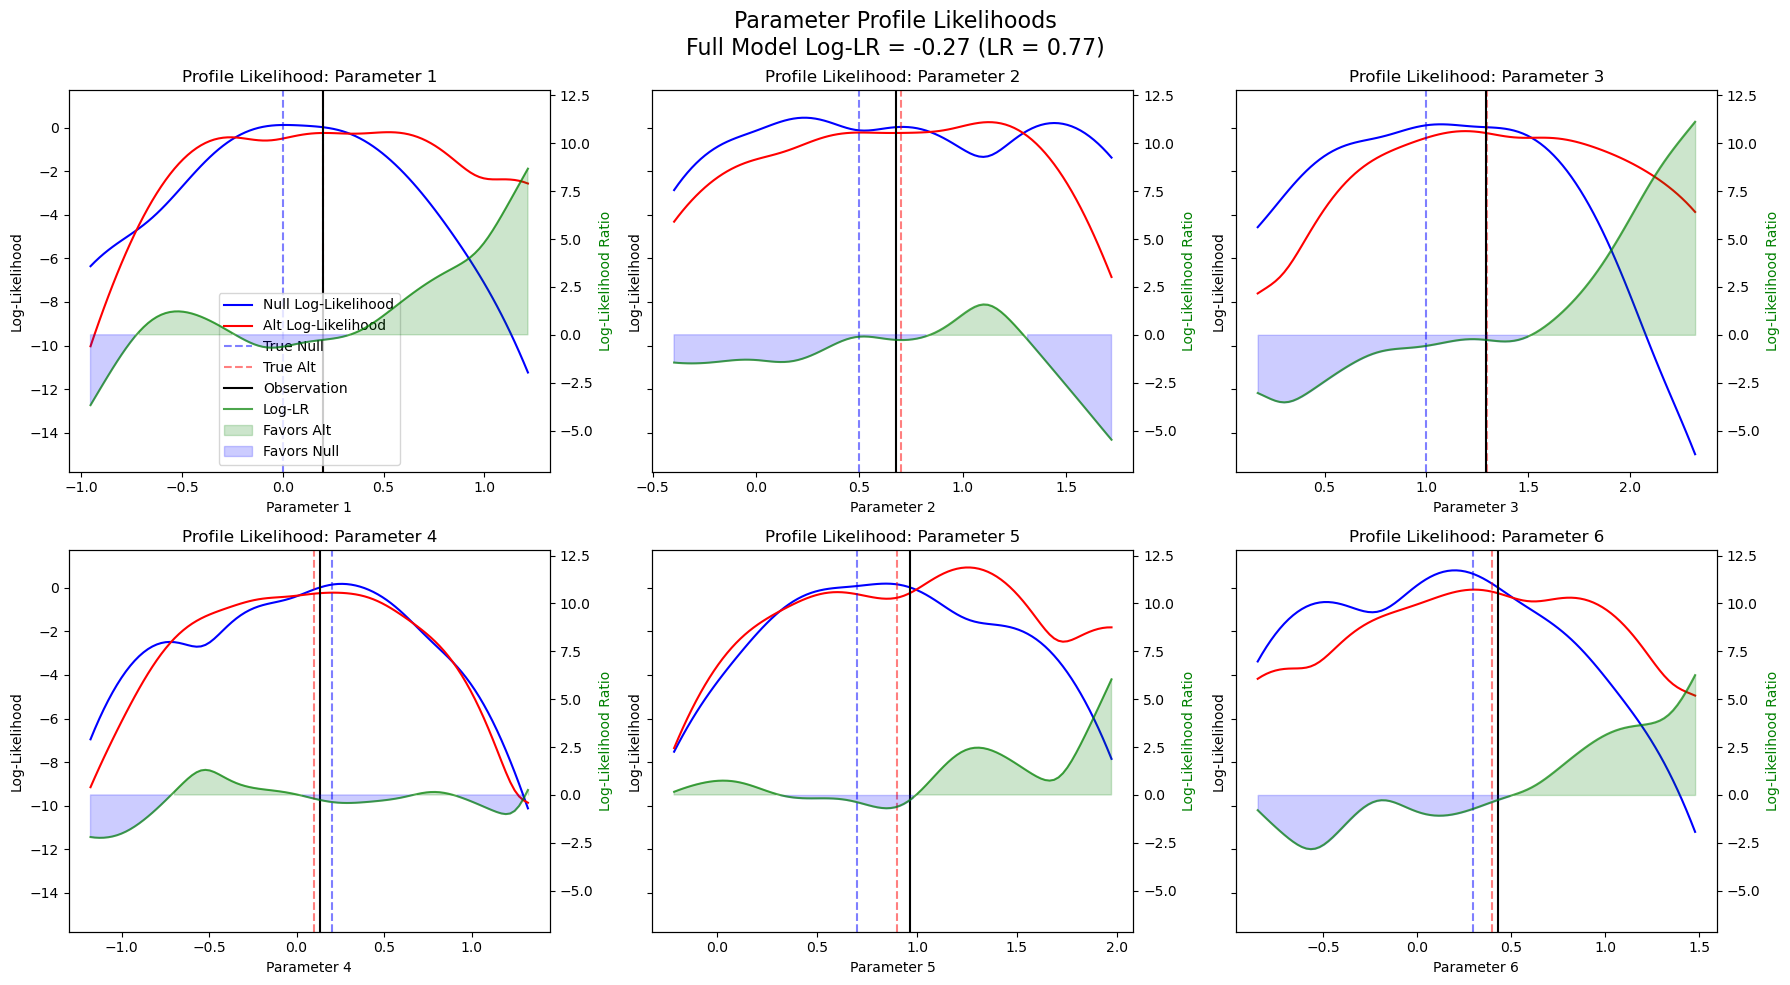

In [28]:
# Plot parameter profiles
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()
parameter_names = [f'Parameter {i+1}' for i in range(6)]

# Store all secondary axes and LR values for consistent scaling
all_secondary_axes = []
all_lr_values = []

for i in range(6):
    # Range for this parameter
    param_min = min(np.min(X_null[:, i]), np.min(X_alt[:, i]))
    param_max = max(np.max(X_null[:, i]), np.max(X_alt[:, i]))
    param_values = np.linspace(param_min, param_max, 100)
    
    # Calculate profile likelihoods
    null_ll, alt_ll = evaluate_profile_likelihood(i, param_values)
    
    # Plot likelihoods
    ax = axes[i]
    ax.plot(param_values, null_ll, 'b-', label='Null Log-Likelihood')
    ax.plot(param_values, alt_ll, 'r-', label='Alt Log-Likelihood')
    
    # Plot log-likelihood ratio on secondary y-axis
    ax2 = ax.twinx()
    all_secondary_axes.append(ax2)
    
    lr = alt_ll - null_ll
    all_lr_values.append(lr)
    
    ax2.plot(param_values, lr, 'g-', label='Log-LR', alpha=0.7)
    ax2.fill_between(param_values, 0, lr, where=(lr > 0), 
                     color='green', alpha=0.2, label='Favors Alt')
    ax2.fill_between(param_values, 0, lr, where=(lr < 0), 
                     color='blue', alpha=0.2, label='Favors Null')
    
    # Mark true parameter values and observation
    ax.axvline(true_null_params[i], color='blue', linestyle='--', 
               alpha=0.5, label='True Null')
    ax.axvline(true_alt_params[i], color='red', linestyle='--', 
               alpha=0.5, label='True Alt')
    ax.axvline(observation[i], color='black', linestyle='-', 
               label='Observation')
    
    ax.set_xlabel(parameter_names[i])
    ax.set_ylabel('Log-Likelihood')
    ax2.set_ylabel('Log-Likelihood Ratio', color='g')
    ax.set_title(f'Profile Likelihood: {parameter_names[i]}')
    
    # Only show legend on first plot to avoid clutter
    if i == 0:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Set consistent y limits for all secondary axes
all_lr = np.concatenate(all_lr_values)
lr_min = np.min(all_lr)
lr_max = np.max(all_lr)
# Add a small margin
margin = 0.1 * (lr_max - lr_min)
for ax2 in all_secondary_axes:
    ax2.set_ylim(lr_min - margin, lr_max + margin)

# Full model results
log_likelihood_null = kde_null.score_samples(observation.reshape(1, -1))[0]
log_likelihood_alt = kde_alt.score_samples(observation.reshape(1, -1))[0]
log_lr = log_likelihood_alt - log_likelihood_null
lr = np.exp(log_lr)

plt.suptitle(f"Parameter Profile Likelihoods\nFull Model Log-LR = {log_lr:.2f} (LR = {lr:.2f})", 
             fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

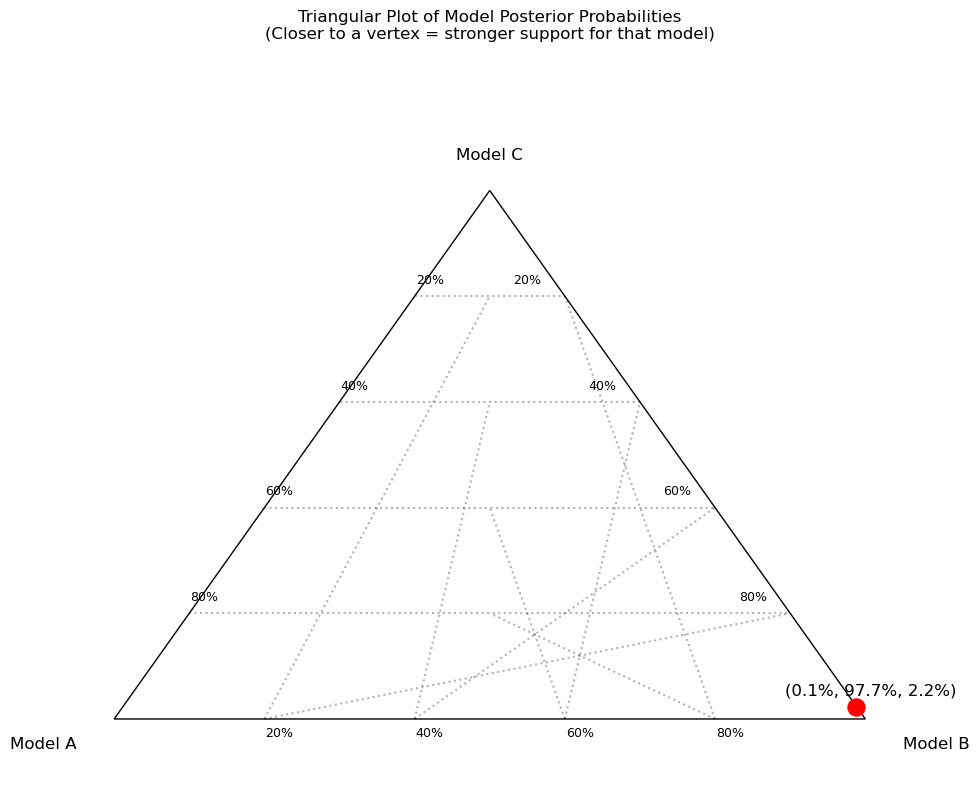

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd

# Example model comparison metrics
models = ['Model A', 'Model B', 'Model C']

# Log-likelihoods (higher is better)
log_likelihoods = np.array([-105.3, -98.7, -102.5])

# Calculate posterior probabilities using Bayes factors with equal priors
marginal_likelihoods = np.exp(log_likelihoods)
posterior_probs = marginal_likelihoods / np.sum(marginal_likelihoods)

# Create triangular coordinates (sum to 1)
# Ensure probabilities are normalized
probs_normalized = posterior_probs / np.sum(posterior_probs)

# Create the triangle plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the triangle
triangle = Polygon([(0, 0), (1, 0), (0.5, np.sqrt(3)/2)], 
                  fill=False, edgecolor='black')
ax.add_patch(triangle)

# Add gridlines and annotations
for i in np.arange(0.2, 1, 0.2):
    # Draw lines parallel to each side
    ax.plot([i, i/2+0.5*(1-i)], [0, (1-i)*np.sqrt(3)/2], 'k:', alpha=0.3)
    ax.plot([0.5*i, 1-0.5*i], [i*np.sqrt(3)/2, i*np.sqrt(3)/2], 'k:', alpha=0.3)
    ax.plot([1-i, 0.5+0.5*i], [0, (1-i)*np.sqrt(3)/2], 'k:', alpha=0.3)
    
    # Add percentage labels
    ax.text(i+0.02, -0.03, f"{int(i*100)}%", fontsize=9, ha='center')
    ax.text(0.5-i/2+0.02, np.sqrt(3)/2*(1-i)+0.02, f"{int(i*100)}%", fontsize=9, ha='center')
    ax.text(0.5+i/2-0.05, np.sqrt(3)/2*(1-i)+0.02, f"{int(i*100)}%", fontsize=9, ha='center')

# Add vertices labels (models)
ax.text(-0.05, -0.05, models[0], fontsize=12, ha='right')
ax.text(1.05, -0.05, models[1], fontsize=12, ha='left')
ax.text(0.5, np.sqrt(3)/2+0.05, models[2], fontsize=12, ha='center')

# Convert posterior probabilities to triangular coordinates
# For each point (a,b,c) where a+b+c=1, the position is:
# x = b + c/2
# y = c*sqrt(3)/2
x = probs_normalized[1] + probs_normalized[2]/2
y = probs_normalized[2] * np.sqrt(3)/2

# Plot the point
ax.scatter(x, y, s=150, color='red', zorder=5)
ax.text(x+0.02, y+0.02, f"({probs_normalized[0]:.1%}, {probs_normalized[1]:.1%}, {probs_normalized[2]:.1%})", 
         fontsize=12, ha='center')

# Set axis limits and remove ticks
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.axis('off')

plt.title("Triangular Plot of Model Posterior Probabilities\n(Closer to a vertex = stronger support for that model)")
plt.tight_layout()
plt.show()

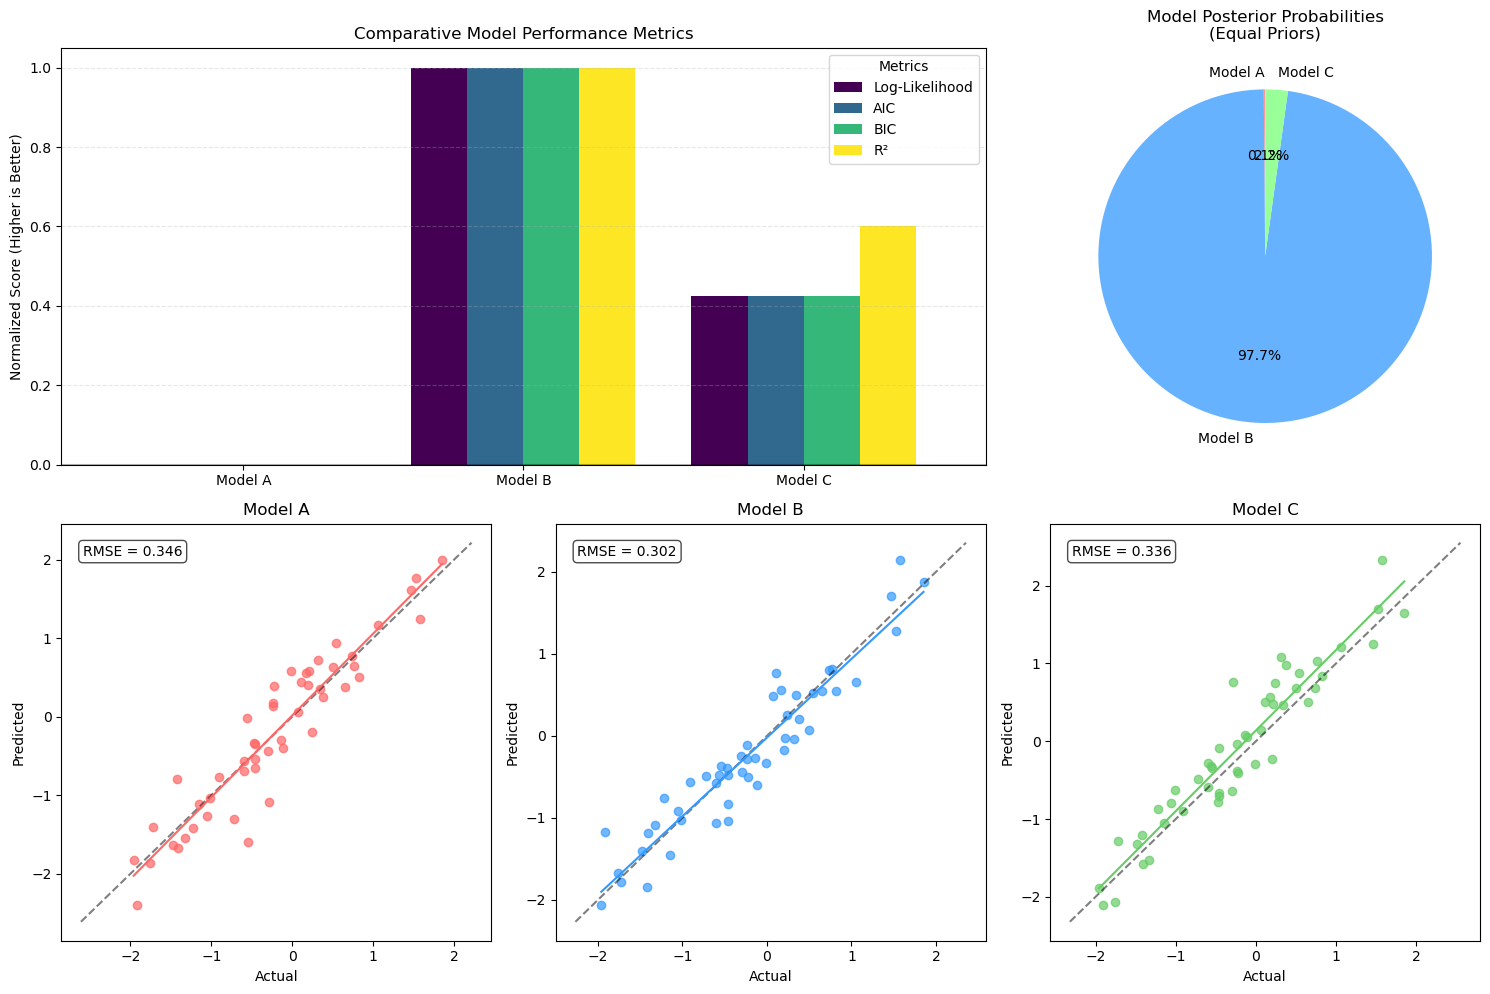

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

# Example data for three models
models = ['Model A', 'Model B', 'Model C']
metrics = {
    'Log-Likelihood': [-105.3, -98.7, -102.5],
    'AIC': [220.6, 207.4, 215.0],
    'BIC': [230.3, 217.1, 224.7],
    'R²': [0.82, 0.87, 0.85]
}

# Training data performance
# Simulated predicted vs actual for visualization
np.random.seed(42)
n_points = 50
actual = np.random.normal(0, 1, n_points)
predictions = {
    'Model A': actual + np.random.normal(0, 0.4, n_points),
    'Model B': actual + np.random.normal(0, 0.3, n_points),
    'Model C': actual + np.random.normal(0.1, 0.35, n_points)
}

# Create the visualization
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 3, figure=fig)

# 1. Bar plot of key metrics
ax1 = fig.add_subplot(gs[0, :2])
metrics_df = pd.DataFrame(metrics)

# Normalize metrics for comparison (higher is better)
normalized = metrics_df.copy()
for col in normalized.columns:
    if col in ['AIC', 'BIC']:  # Lower is better
        normalized[col] = (normalized[col].max() - normalized[col]) / (normalized[col].max() - normalized[col].min())
    else:  # Higher is better
        normalized[col] = (normalized[col] - normalized[col].min()) / (normalized[col].max() - normalized[col].min())

# Plot normalized metrics
normalized.index = models
normalized.plot(kind='bar', ax=ax1, width=0.8, rot=0, colormap='viridis')
ax1.set_ylabel('Normalized Score (Higher is Better)')
ax1.set_title('Comparative Model Performance Metrics')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
ax1.legend(title='Metrics')

# 2. Posterior probabilities pie chart
ax2 = fig.add_subplot(gs[0, 2])
marginal_likelihoods = np.exp(metrics['Log-Likelihood'])
posterior_probs = marginal_likelihoods / np.sum(marginal_likelihoods)
ax2.pie(posterior_probs, labels=models, autopct='%1.1f%%', 
        startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
ax2.set_title('Model Posterior Probabilities\n(Equal Priors)')

# 3. Scatter plots of predicted vs actual for each model
colors = ['#FF6666', '#3399FF', '#66CC66'] 
for i, model in enumerate(models):
    ax = fig.add_subplot(gs[1, i])
    ax.scatter(actual, predictions[model], alpha=0.7, color=colors[i])
    
    # Add diagonal line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1])
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5)
    
    # Add regression line
    coef = np.polyfit(actual, predictions[model], 1)
    poly_line = np.poly1d(coef)
    ax.plot(np.sort(actual), poly_line(np.sort(actual)), color=colors[i], linestyle='-')
    
    # Calculate and display RMSE
    rmse = np.sqrt(np.mean((predictions[model] - actual) ** 2))
    ax.text(0.05, 0.95, f'RMSE = {rmse:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'{model}')

plt.tight_layout()
plt.show()

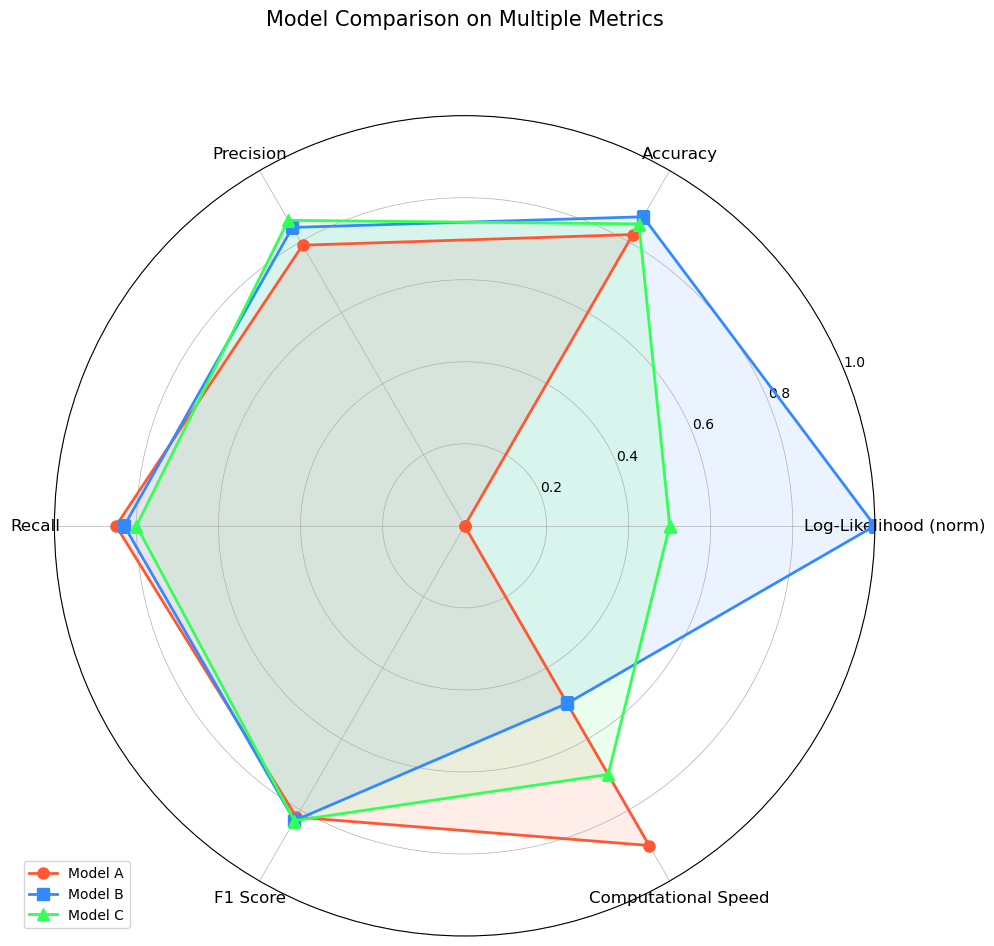

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example metrics for three models
models = ['Model A', 'Model B', 'Model C']
metrics = {
    'Log-Likelihood (norm)': [0.0, 1.0, 0.5],  # Normalized [0-1] where higher is better
    'Accuracy': [0.82, 0.87, 0.85],
    'Precision': [0.79, 0.84, 0.86],
    'Recall': [0.85, 0.83, 0.80],
    'F1 Score': [0.82, 0.83, 0.83],
    'Computational Speed': [0.9, 0.5, 0.7]  # Normalized [0-1] where higher is better
}

# Set up radar chart
categories = list(metrics.keys())
N = len(categories)

# Create angles for each metric (equally spaced around the circle)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Extract data for each model
model_data = []
for model in models:
    values = [metrics[category][models.index(model)] for category in categories]
    values += values[:1]  # Close the loop
    model_data.append(values)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Set the angle labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Draw the model data
colors = ['#FF5733', '#338AFF', '#33FF57']
markers = ['o', 's', '^']
for i, model in enumerate(models):
    ax.plot(angles, model_data[i], color=colors[i], linewidth=2, 
            marker=markers[i], markersize=8, label=model)
    ax.fill(angles, model_data[i], color=colors[i], alpha=0.1)

# Customize the chart
ax.set_ylim(0, 1)
ax.set_title('Model Comparison on Multiple Metrics', fontsize=15, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add grid lines and labels
ax.grid(True, linewidth=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3984559/3137413297.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


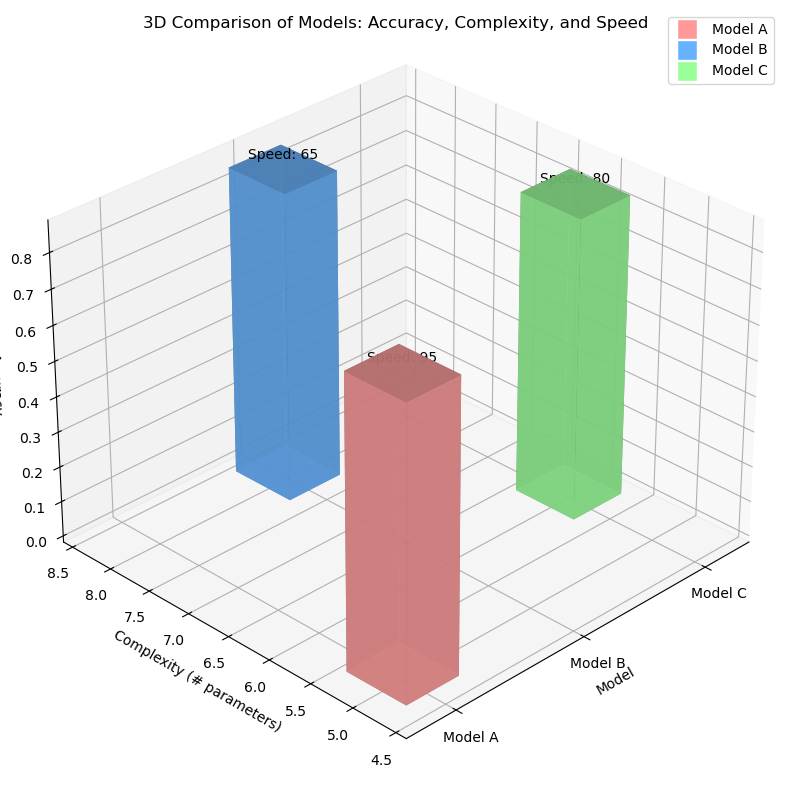

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data metrics for visualization
models = ['Model A', 'Model B', 'Model C']
complexity = np.array([5, 8, 6])  # Number of parameters
accuracy = np.array([0.82, 0.87, 0.85])  # Accuracy metric
speed = np.array([95, 65, 80])  # Computation speed (higher is better)

# Set up the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate x, y coordinates for the models
x = np.arange(len(models))
y = complexity

# Plot the bars
width = 0.4
depth = 0.7

colors = ['#FF9999', '#66B2FF', '#99FF99']
for i in range(len(models)):
    ax.bar3d(i-width/2, y[i]-depth/2, 0, width, depth, accuracy[i], 
             color=colors[i], alpha=0.8, shade=True)
    
    # Add speed as text annotation
    ax.text(i, y[i], accuracy[i]+0.02, f"Speed: {speed[i]}", 
            ha='center', va='bottom', fontsize=10)

# Set the axis labels
ax.set_xlabel('Model')
ax.set_ylabel('Complexity (# parameters)')
ax.set_zlabel('Accuracy')

# Set the ticks
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title('3D Comparison of Models: Accuracy, Complexity, and Speed', y=1.05)

# Add a legend with color coding
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[i], 
                         label=models[i], markersize=15) for i in range(len(models))]
ax.legend(handles=legend_elements, loc='upper right')

# Improve perspective
ax.view_init(elev=30, azim=225)
plt.tight_layout()
plt.show()

# For interactive exploration, you would use:
# from ipywidgets import interactive
# def rotate_plot(elev, azim):
#     ax.view_init(elev=elev, azim=azim)
#     return fig
# interactive(rotate_plot, elev=(0,90,5), azim=(0,360,5))

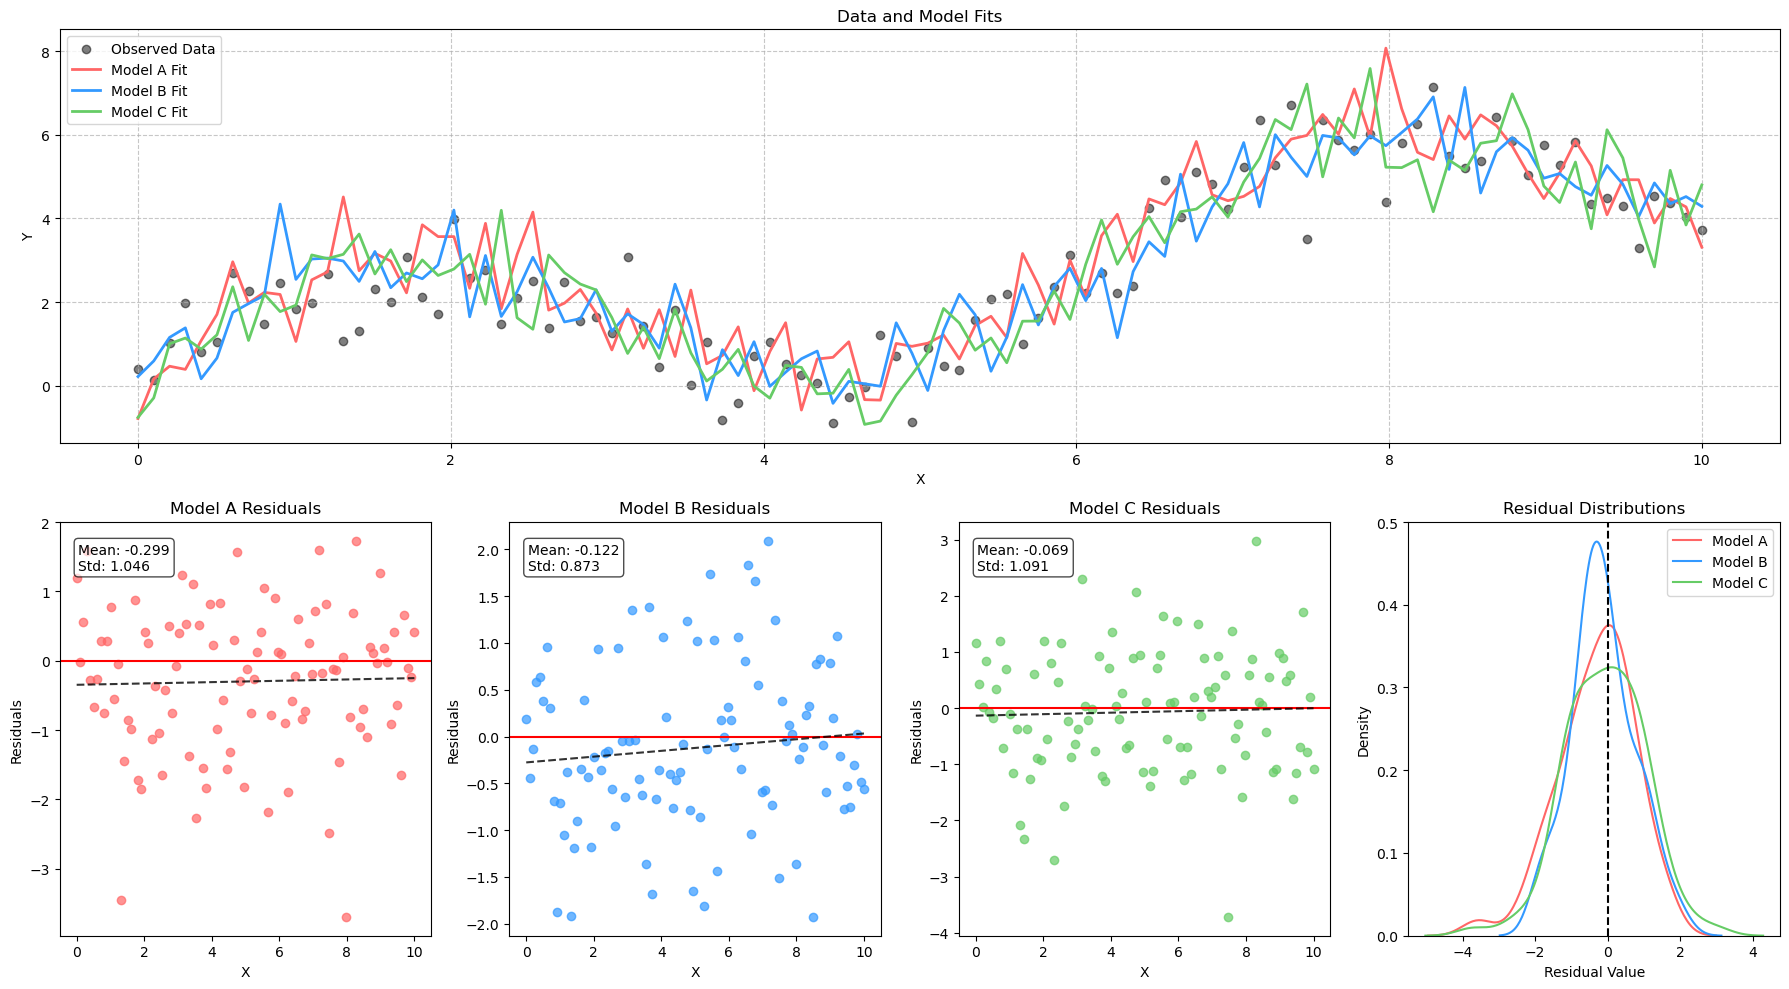

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
np.random.seed(42)
x = np.linspace(0, 10, 100)
true_y = 2 * np.sin(x) + 0.5 * x
noise = np.random.normal(0, 0.8, len(x))
observed_y = true_y + noise

# Three different model predictions (simulated)
predictions = {
    'Model A': true_y + np.random.normal(0.2, 0.7, len(x)),  # Biased, medium variance
    'Model B': true_y + np.random.normal(0, 0.6, len(x)),    # Unbiased, medium variance
    'Model C': true_y + np.random.normal(-0.1, 0.8, len(x))  # Slightly biased, high variance
}

# Calculate residuals
residuals = {model: observed_y - pred for model, pred in predictions.items()}

# Create the visualization
fig = plt.figure(figsize=(18, 10))
gs = plt.GridSpec(2, 4, figure=fig)

# Colors for the models
colors = {'Model A': '#FF6666', 'Model B': '#3399FF', 'Model C': '#66CC66'}

# 1. Data and model fits
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(x, observed_y, color='black', alpha=0.5, label='Observed Data')

for model, pred in predictions.items():
    ax1.plot(x, pred, '-', linewidth=2, color=colors[model], label=f'{model} Fit')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Data and Model Fits')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Residual plots
for i, (model, res) in enumerate(residuals.items()):
    ax = fig.add_subplot(gs[1, i])
    
    # Scatter plot of residuals
    ax.scatter(x, res, alpha=0.7, color=colors[model])
    ax.axhline(y=0, color='r', linestyle='-')
    
    # Add trend line to check for patterns
    z = np.polyfit(x, res, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), '--', color='k', alpha=0.8)
    
    # Add residual statistics
    mean_res = np.mean(res)
    std_res = np.std(res)
    ax.text(0.05, 0.95, f'Mean: {mean_res:.3f}\nStd: {std_res:.3f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{model} Residuals')

# 3. Residual distributions
ax4 = fig.add_subplot(gs[1, 3])
for model, res in residuals.items():
    sns.kdeplot(res, label=model, color=colors[model])

ax4.axvline(x=0, color='k', linestyle='--')
ax4.set_xlabel('Residual Value')
ax4.set_ylabel('Density')
ax4.set_title('Residual Distributions')
ax4.legend()

plt.tight_layout()
plt.show()